In [33]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Load and Inspect the table

In [34]:
# Load the Dataset
df = pd.read_csv("C:/Users/Lenovo/Documents/AB Testing Analysis/ab_data.csv")

In [35]:
# Lets Inspect the dataset
df.shape

(294478, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [37]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

## Data Cleaning

In [39]:
# Let's change the type of timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [40]:
print(df['timestamp'].dtype)

datetime64[ns]


In [41]:
# Check for dublicate entries

print(df.duplicated().sum())

0


In [42]:
# Check for missing values
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


In [43]:
# Ensuring correct matching of group and landing_page for correct

# Find mismatched rows
mismatched_rows = df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
                     ((df['group'] == 'control') & (df['landing_page'] != 'old_page'))]

# Show number of mismatches
print(f"Number of mismatched rows: {len(mismatched_rows)}")

# Preview mismatched data
mismatched_rows

Number of mismatched rows: 3893


,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [44]:
mismatched_rows.to_csv(r'C:\Users\Lenovo\Documents\AB Testing Analysis\mismatched_rows.csv', index=False)

In [45]:
# Let's remove the mismatch rows 
df = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
        ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]


In [46]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


### Segmenting and Group Checking

In [47]:
print(df['group'].value_counts())
print(df['landing_page'].value_counts())

group
treatment    145311
control      145274
Name: count, dtype: int64
landing_page
new_page    145311
old_page    145274
Name: count, dtype: int64


In [48]:
# Let's check for conversion rate
converted_control = df[(df['group'] == 'control')]['converted']
converted_treatment = df[(df['group'] == 'treatment')]['converted']

# Mean conversion
control_rate = converted_control.mean()
treatment_rate = converted_treatment.mean()

print("Control conversion rate:", control_rate)
print("Treatment conversion rate:", treatment_rate)

Control conversion rate: 0.1203863045004612
Treatment conversion rate: 0.11880724790277405


### Statistical Significance Testing((Z-Test for proportions)

In [54]:
# Counts
Success = [converted_treatment.sum(), converted_control.sum()]
nobs = [converted_treatment.count(), converted_control.count()]

# Let's perform Z-test
z_stat, p_value = sm.stats.proportions_ztest(Success, nobs)
print(f"Z-statistics: {z_stat:.4f}")
print(f"P_value: {p_value:.4f}")

Z-statistics: -1.3116
P_value: 0.1897


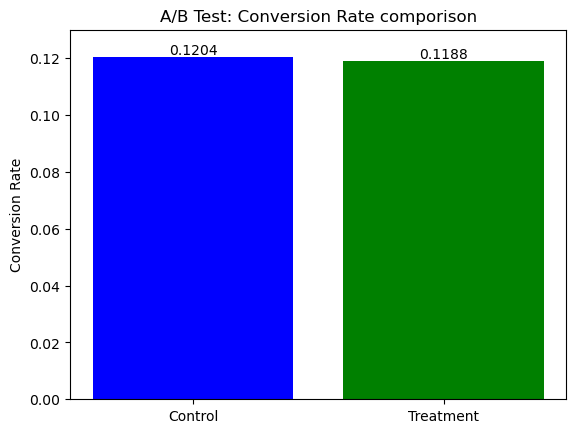

In [58]:
# Let's plot the bar to see the clear result because there is no statistical significance
conversion_rates = [control_rate, treatment_rate]
labels = ['Control', 'Treatment']

plt.bar(labels, conversion_rates, color=['blue', 'green'])
plt.ylabel("Conversion Rate")
plt.title("A/B Test: Conversion Rate comporison")
plt.ylim(0, 0.13)
plt.text(0, control_rate + 0.001, f"{control_rate:.4f}", ha='center')
plt.text(1, treatment_rate + 0.001, f"{treatment_rate:.4f}", ha='center')

plt.show()

## Business Interpretation

In [59]:
diff = treatment_rate - control_rate
lift = (diff / control_rate) * 100

print(f"Lift in conversion rate: {lift:.2f}%")

if p_value < 0.05:
    print("✅ Recommend rollout of the new webpage – it's significantly better.")
else:
    print("❌ No statistically significant difference. Do not roll out yet.")


Lift in conversion rate: -1.31%
❌ No statistically significant difference. Do not roll out yet.


In [60]:
summary = {
    "Control Conversion Rate": control_rate,
    "Treatment Conversion Rate": treatment_rate,
    "Lift (%)": lift,
    "P-Value": p_value,
    "Statistically Significant": p_value < 0.05
}

summary_df = pd.DataFrame([summary])
print(summary_df)


   Control Conversion Rate  Treatment Conversion Rate  Lift (%)   P-Value  \
0                 0.120386                   0.118807 -1.311658  0.189653   

   Statistically Significant  
0                      False  
